# Face detection with Haar Cascade and CNN

- Minor Applied Artificial Intelligence - Semester 2
- Tuesday March 14 2023
- Lecturers: Frank Aldershoff & Michiel Bontenbal


## Contents
1. Face detection with Haar Cascade
2. Face detection with MTCNN

Source:
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

# 1. Face detection with Haar Cascade

## Importeer libraries

In [36]:
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

In [37]:
print(cv.__version__)

4.7.0


## Importeer en toon afbeelding

Zoek een kleuren foto met 5 tot 10 gezichten.

Laad de afbeelding in. Welk datatype heeft de ingeladen afbeelding?


 Laat de foto op het scherm zien. Hoeveel gezichten zie jij?

<class 'numpy.ndarray'>
(408, 612, 3)


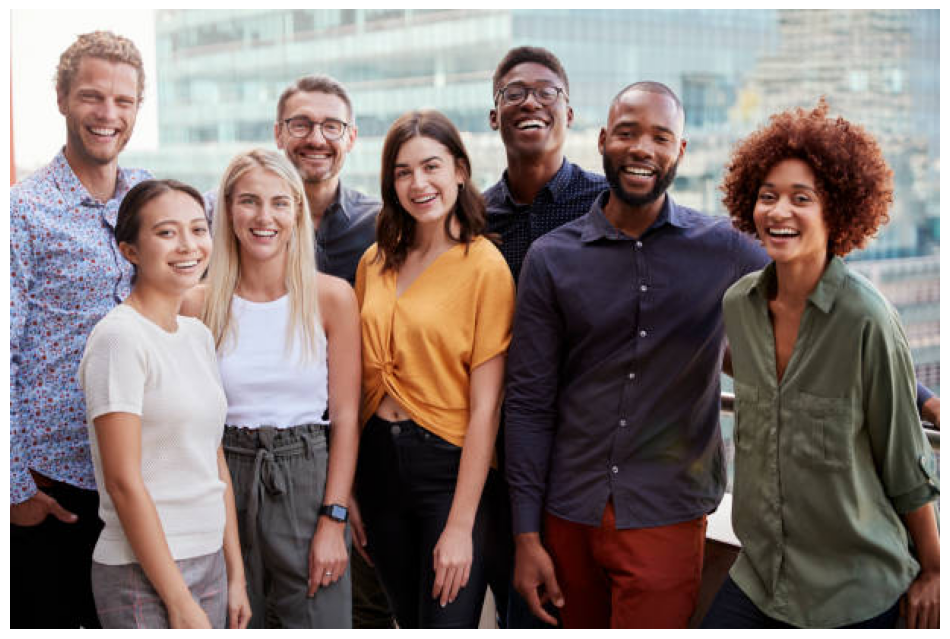

In [38]:
img = plt.imread('/Users/sennechin/AppliedAI/dataSets/Images/groupphoto.jpg') # geen .png, dan gaat het verderop mis
print(type(img))
print(img.shape)
plt.figure(figsize=(12,10))
plt.imshow(img);
plt.axis('off');

In [39]:
#check the datatype
img[0,0,:].dtype

dtype('uint8')

## Initieer detector

Vind online de Haar Cascade classifier: haarcascade_frontalface_default.xml en download deze naar je folder.

In [40]:
#initiate the Haar Cascade classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_alt.xml')

#check if this is succesful
print("Is de classifier leeg? --> " + str(face_cascade.empty()))

Is de classifier leeg? --> False


## Zet een kleurenplaatje om in een grijswaarde plaatje.

Als je foto al zwart-wit is dan kun je deze stap overslaan.

In [41]:
#convert to gray
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Detecteer gezichten

Bepaal met de classiefier de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [42]:
haar_faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(10, 10),
        flags=cv.CASCADE_SCALE_IMAGE)

print("Aantal gezichten: " + str(haar_faces.shape[0]))

Aantal gezichten: 6


## Toon rechthoeken rond gezichten

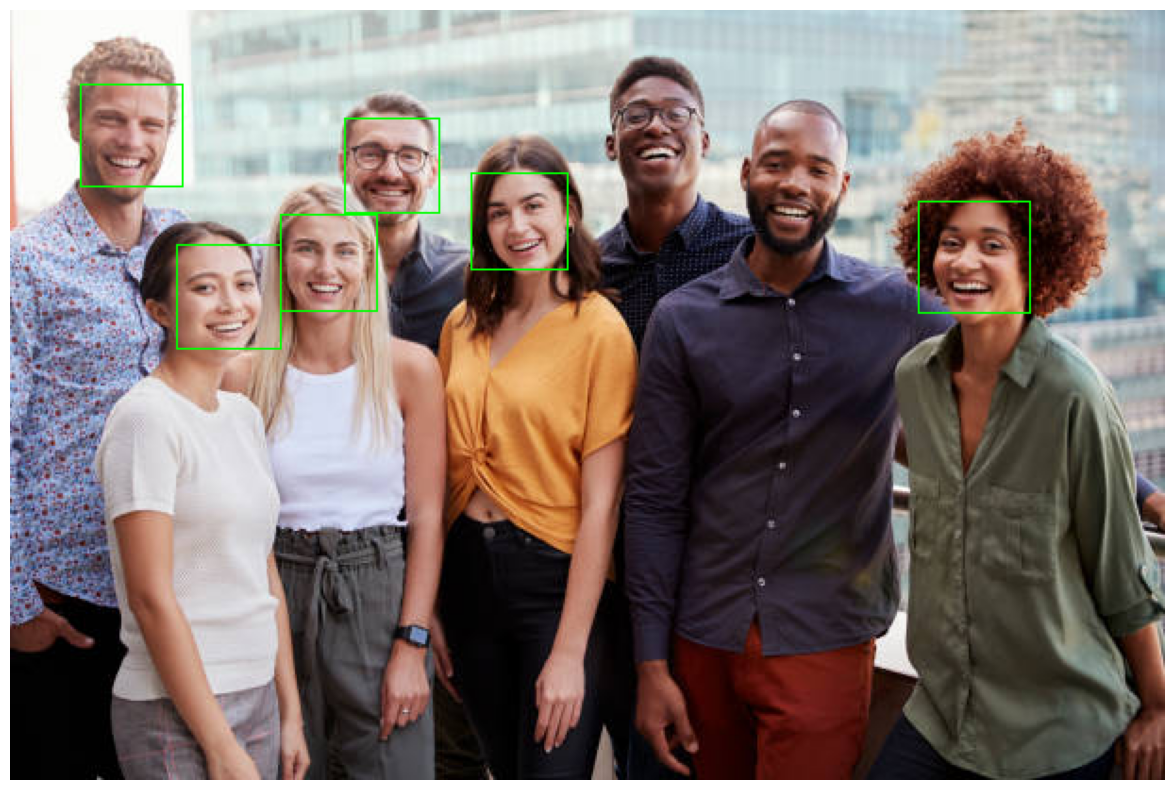

In [43]:
for (x,y,w,h) in haar_faces:
    cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
    
plt.figure(figsize=(15,10))
plt.imshow(img);
plt.axis('off');

# 2. Face detection with Multi-Task Cascaded Convolutional Neural Network

Install the face detection package: MTCNN.

Source: https://pypi.org/project/mtcnn/

Make sure you've installed tensorflow as well.

In [44]:
!pip install mtcnn

zsh:1: command not found: pip


In [45]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [46]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

In [47]:
filename = '/Users/sennechin/AppliedAI/dataSets/Images/groupphoto.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
mtcnn_faces = detector.detect_faces(pixels)

print("Aantal gezichten: " + str(len(mtcnn_faces)))

3/3 [==============================] - 0s 7ms/step
Aantal gezichten: 8


In [48]:
#print the values associated with the first face
mtcnn_faces[0]

{'box': [390, 59, 49, 65],
 'confidence': 1.0,
 'keypoints': {'left_eye': (405, 81),
  'right_eye': (428, 84),
  'nose': (417, 94),
  'mouth_left': (402, 104),
  'mouth_right': (425, 107)}}

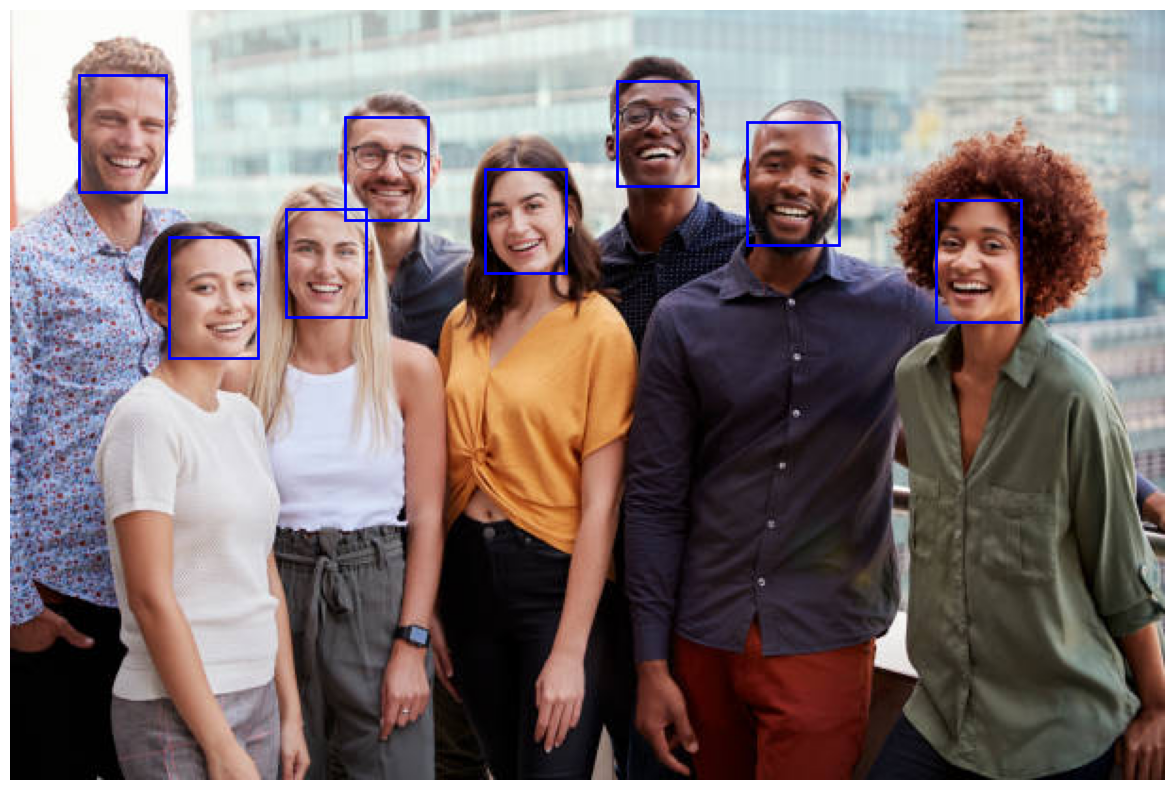

In [49]:
def draw_image_with_boxes(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box'] 
        rect = Rectangle((x, y), width, height, fill=False, color='blue',linewidth=2.0)
        ax.add_patch(rect)
        
    plt.show()


draw_image_with_boxes(pixels, mtcnn_faces)

**OPDRACHT**: evalueer de verschillen tussen de Haar Cascade classifier en de MTCNN detector.

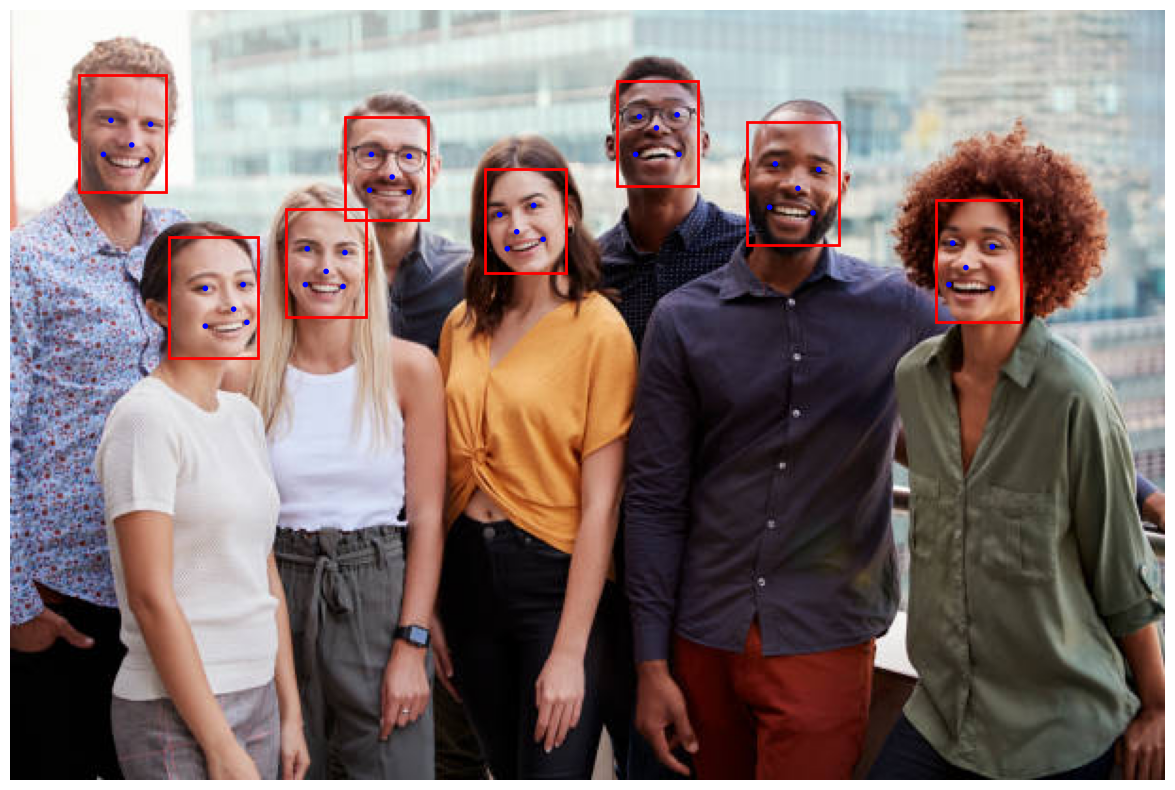

In [50]:
def draw_faces(image, result_list):
    plt.figure(figsize=(15,10))
    plt.axis('off')
    plt.imshow(image)
    
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red',linewidth=2.0)
        ax.add_patch(rect)
        
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=1.1, color='blue')
            ax.add_patch(dot)
            
    plt.show()

draw_faces(pixels, mtcnn_faces)